In [1]:
import os
import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
lib.myelin.SET_CACHE = True
DATA_DIR = os.path.join(lib.basic.DATA_DIR(), 'myelin_grad')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
maps = {}
regions = ['cb', 'cc', 'sc']
map_funcs = [lib.myelin.get_cb_map, lib.myelin.get_cc_map, lib.myelin.get_sc_map]

In [3]:
# Generating myelination maps, and write output to pickle files
for region, map_func in zip(regions, map_funcs):
    maps[region] = lib.myelin.get_maps_of_all_subs(map_func, show_progress=True)
    maps[region].to_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle'))

Computing myelin maps by "get_sc_map": 100%|██████████| 652/652 [00:11<00:00, 57.74it/s]


In [4]:
# Loading myelination maps
maps = {region: pd.read_pickle(os.path.join(DATA_DIR, f'{region}_maps.pickle')) for region in regions}

# Gradient analysis
basic_grad_results, time_profiles, time_profiles_mean = {}, {}, {}
for region in regions:
    _, grad_pca = lib.grad.basic_grad_pca(maps[region], fill_outliers_with_mean=False)
    basic_grad_results[region] = grad_pca
    time_profiles[region] = lib.grad.get_time_profile(basic_grad_results[region])
    time_profiles_mean[region] = np.row_stack(time_profiles[region]['mean'])

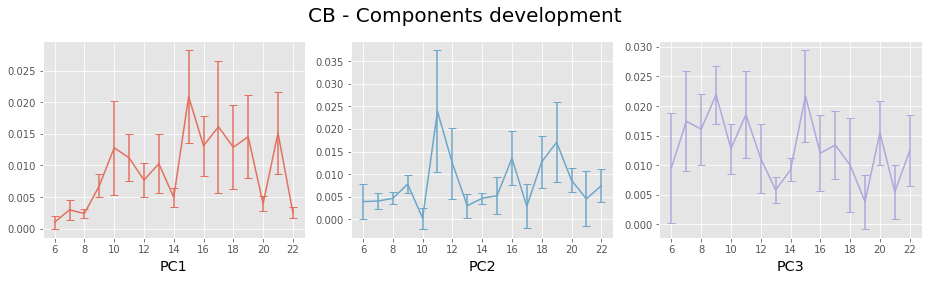

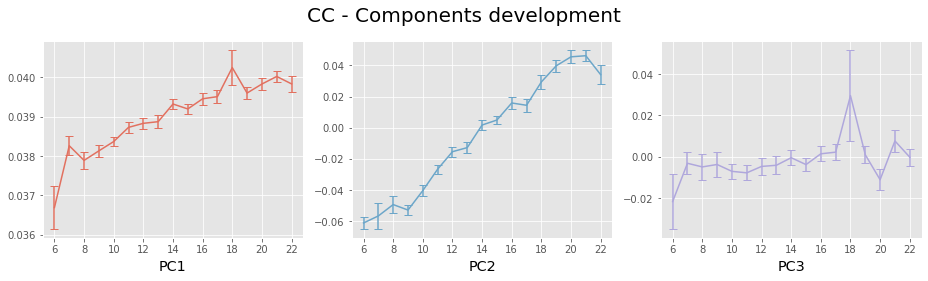

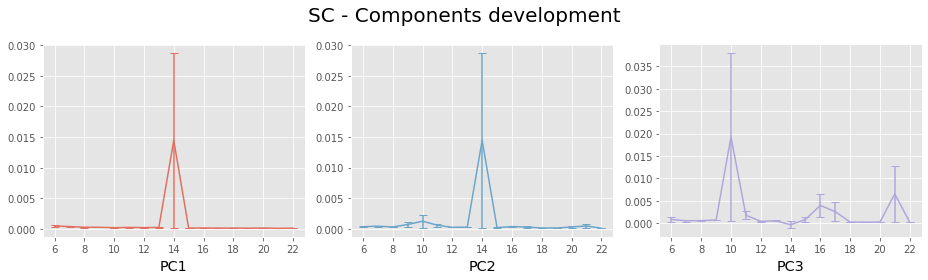

In [5]:
# Plots
for region in regions:
    lib.grad.plot_time_profile(time_profiles[region], n_comp=3, roi_name=region.upper())

In [10]:
arr = np.row_stack(maps['sc'][maps['sc']['age'] == 14]['data'])

In [34]:
i = 11
arr[i][lib.preprocess.niqr_outlier_indices(arr[11], 3.0)]

array([22.42951736, 17.8971041 , 10.02569769, 10.15216133, 12.63940005,
       13.53020949, 12.91384193, 17.31165762, 18.58508458, 16.22353063,
       13.53684758, 14.60661391, 13.85618172])